In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.stats.weightstats as sw

In [30]:
## read data
control_Group=pd.read_excel('ab_testing.xlsx',sheet_name='Control Group')
test_Group=pd.read_excel('ab_testing.xlsx',sheet_name='Test Group')
control_Group.head()

,Impression,Click,Purchase,Earning
0,82529.459271,6090.077317,665.211255,2311.277143
1,98050.451926,3382.861786,315.084895,1742.806855
2,82696.023549,4167.965750,458.083738,1797.827447
3,109914.400398,4910.882240,487.090773,1696.229178
4,108457.762630,5987.655811,441.034050,1543.720179


数据集包含两个40*4的dataframe,分别为控制组和对照组。每组四个变量为，网页流量，点击数，购买数，和消费总金额。由于数据量=40>30，所以认为是足够大的数据集，因此可以用z分布近似t分布。

In [52]:
test_Group['Clickrate']=test_Group['Click']/test_Group['Impression']*100
test_Group['Purchaserate']=test_Group['Purchase']/test_Group['Impression']*100
test_Group['Earning_per_impression']=test_Group['Earning']/test_Group['Impression']
control_Group['Clickrate']=control_Group['Click']/control_Group['Impression']*100
control_Group['Purchaserate']=control_Group['Purchase']/control_Group['Impression']*100
control_Group['Earning_per_impression']=control_Group['Earning']/control_Group['Impression']


接下来通过画柱状图对整个数据集有一个大致了解,我们可以发现，测试集点击率，购买率都相比于对照集低，但是收入高。

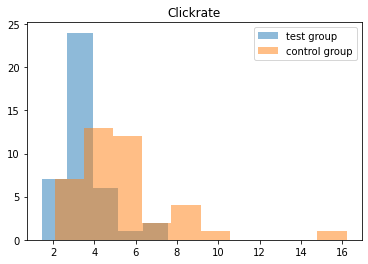

In [46]:
plt.hist(test_Group['Clickrate'],bins=5,alpha=0.5,label='test group')
plt.hist(control_Group['Clickrate'],bins=10,alpha=0.5,label='control group')
plt.title('Clickrate')
plt.legend()
plt.show()

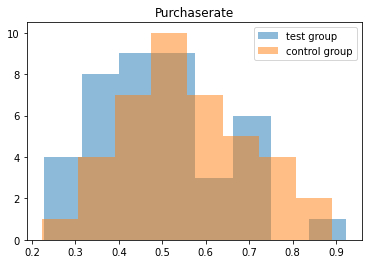

In [51]:
plt.hist(test_Group['Purchaserate'],bins=8,alpha=0.5,label='test group')
plt.hist(control_Group['Purchaserate'],bins=8,alpha=0.5,label='control group')
plt.title('Purchaserate')
plt.legend()
plt.show()

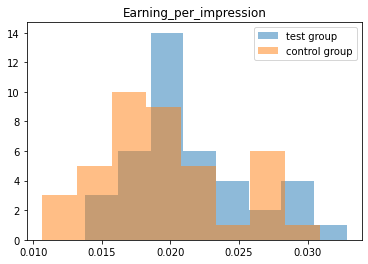

In [57]:
plt.hist(test_Group['Earning_per_impression'],bins=8,alpha=0.5,label='test group')
plt.hist(control_Group['Earning_per_impression'],bins=8,alpha=0.5,label='control group')
plt.title('Earning_per_impression')
plt.legend()
plt.show()

In [79]:
diff=np.mean(test_Group['Clickrate'])-np.mean(control_Group['Clickrate'])
z,pvalue=sw.ztest(test_Group['Clickrate'],control_Group['Clickrate'],alternative='smaller')
if pvalue<0.05:
    print('p-value<0.05, so we reject null hytheposis')
else:
    print('p-value>=0.05, so we fail to reject null hytheposis')

p-value<0.05, so we reject null hytheposis


In [80]:
diff=np.mean(test_Group['Purchaserate'])-np.mean(control_Group['Purchaserate'])
z,pvalue=sw.ztest(test_Group['Purchaserate'],control_Group['Purchaserate'],alternative='smaller')
if pvalue<0.05:
    print('p-value<0.05, so we reject null hytheposis')
else:
    print('p-value>=0.05, so we fail to reject null hytheposis')

p-value<0.05, so we reject null hytheposis


In [81]:
diff=np.mean(test_Group['Earning_per_impression'])-np.mean(control_Group['Earning_per_impression'])
z,pvalue=sw.ztest(test_Group['Earning_per_impression'],control_Group['Earning_per_impression'],alternative='larger')
if pvalue<0.05:
    print('p-value<0.05, so we reject null hytheposis')
else:
    print('p-value>=0.05, so we fail to reject null hytheposis')

p-value<0.05, so we reject null hytheposis


经过单边测试，三个零假设均被拒绝。

虽然统计学意义上我们推翻的零假设，但是我们并不能说这具有实际或者商业上的价值，因此我们还要计算两组的平均收入并比较

In [84]:
diff=np.mean(test_Group['Earning_per_impression'])-np.mean(control_Group['Earning_per_impression'])
per=diff/np.mean(test_Group['Earning_per_impression'])*100
print('The earning in test group is '+str(round(per,2))+'%'+' lager than that in control group ')

The earning in test group is 8.99% lager than that in control group 
